# Import Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import joblib
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from scipy.stats import uniform, randint
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    precision_score,
    recall_score,
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    PrecisionRecallDisplay,
    RocCurveDisplay
)
import warnings

print("Libraries imported successfully.")

Libraries imported successfully.


# Load Data

In [64]:
df = pd.read_csv("/kaggle/input/pdods-1/data.csv",sep=";")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Data Cleaning, Information & Visualization

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [66]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [67]:
df.shape

(4424, 37)

In [68]:
df.size

163688

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [70]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [71]:
df['Target'] = LabelEncoder().fit_transform(df['Target'])

In [72]:
df['Target'].value_counts()

Target
2    2209
0    1421
1     794
Name: count, dtype: int64

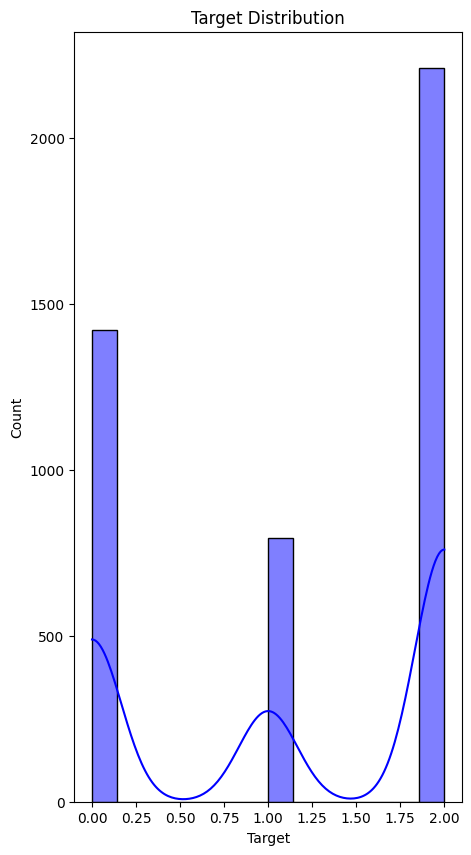

In [73]:
df.columns = df.columns.str.replace('\t', '')

plt.figure(figsize=(5, 10))

# kde=True adds the density curve (the smooth line)
sns.histplot(df['Target'], color="Blue", kde=True)

plt.title("Target Distribution")
plt.show()

Text(0.5, 1.0, 'Target')

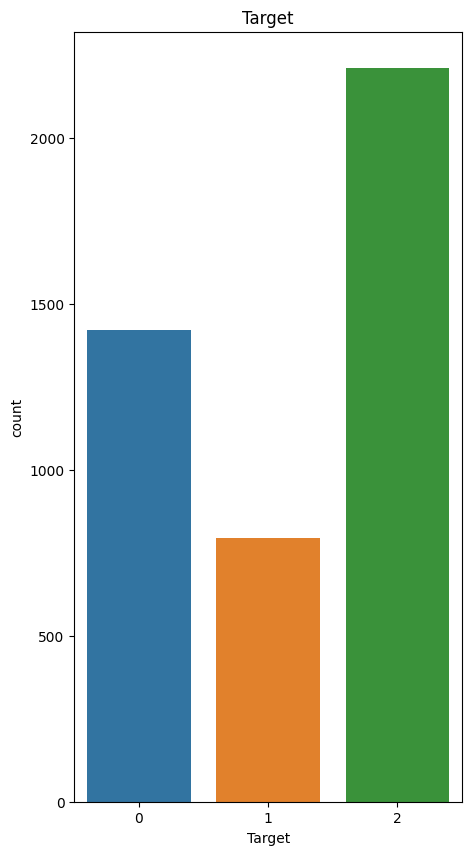

In [74]:
plt.figure(figsize=(5, 10))
sns.countplot(data = df, x="Target").set_title('Target')

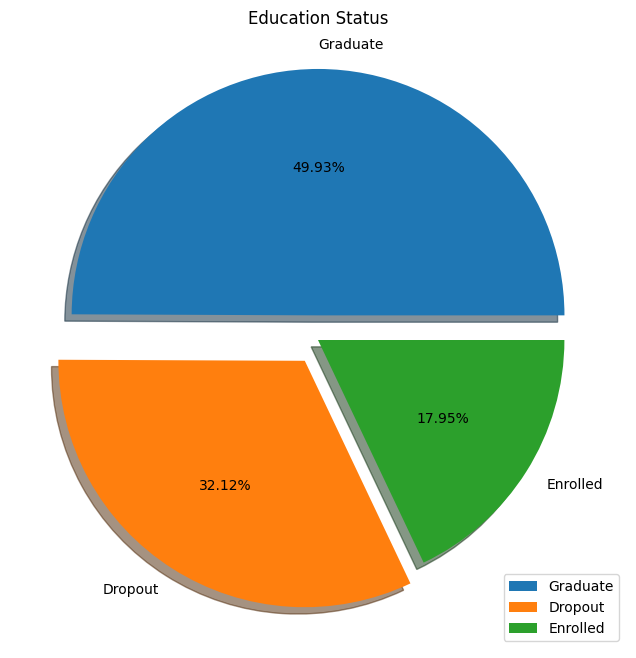

In [75]:
plt.figure(figsize=(8, 8))
plt.title("Education Status")
plt.pie(df['Target'].value_counts(), labels = ['Graduate', 'Dropout', 'Enrolled'], explode = (0.1, 0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

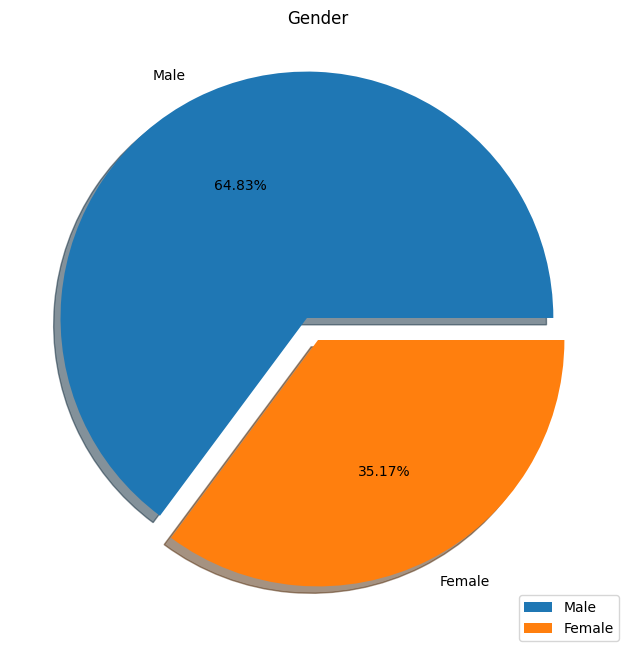

In [76]:
plt.figure(figsize=(8, 8))
plt.title("Gender")
plt.pie(df['Gender'].value_counts(), labels = ['Male', 'Female'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

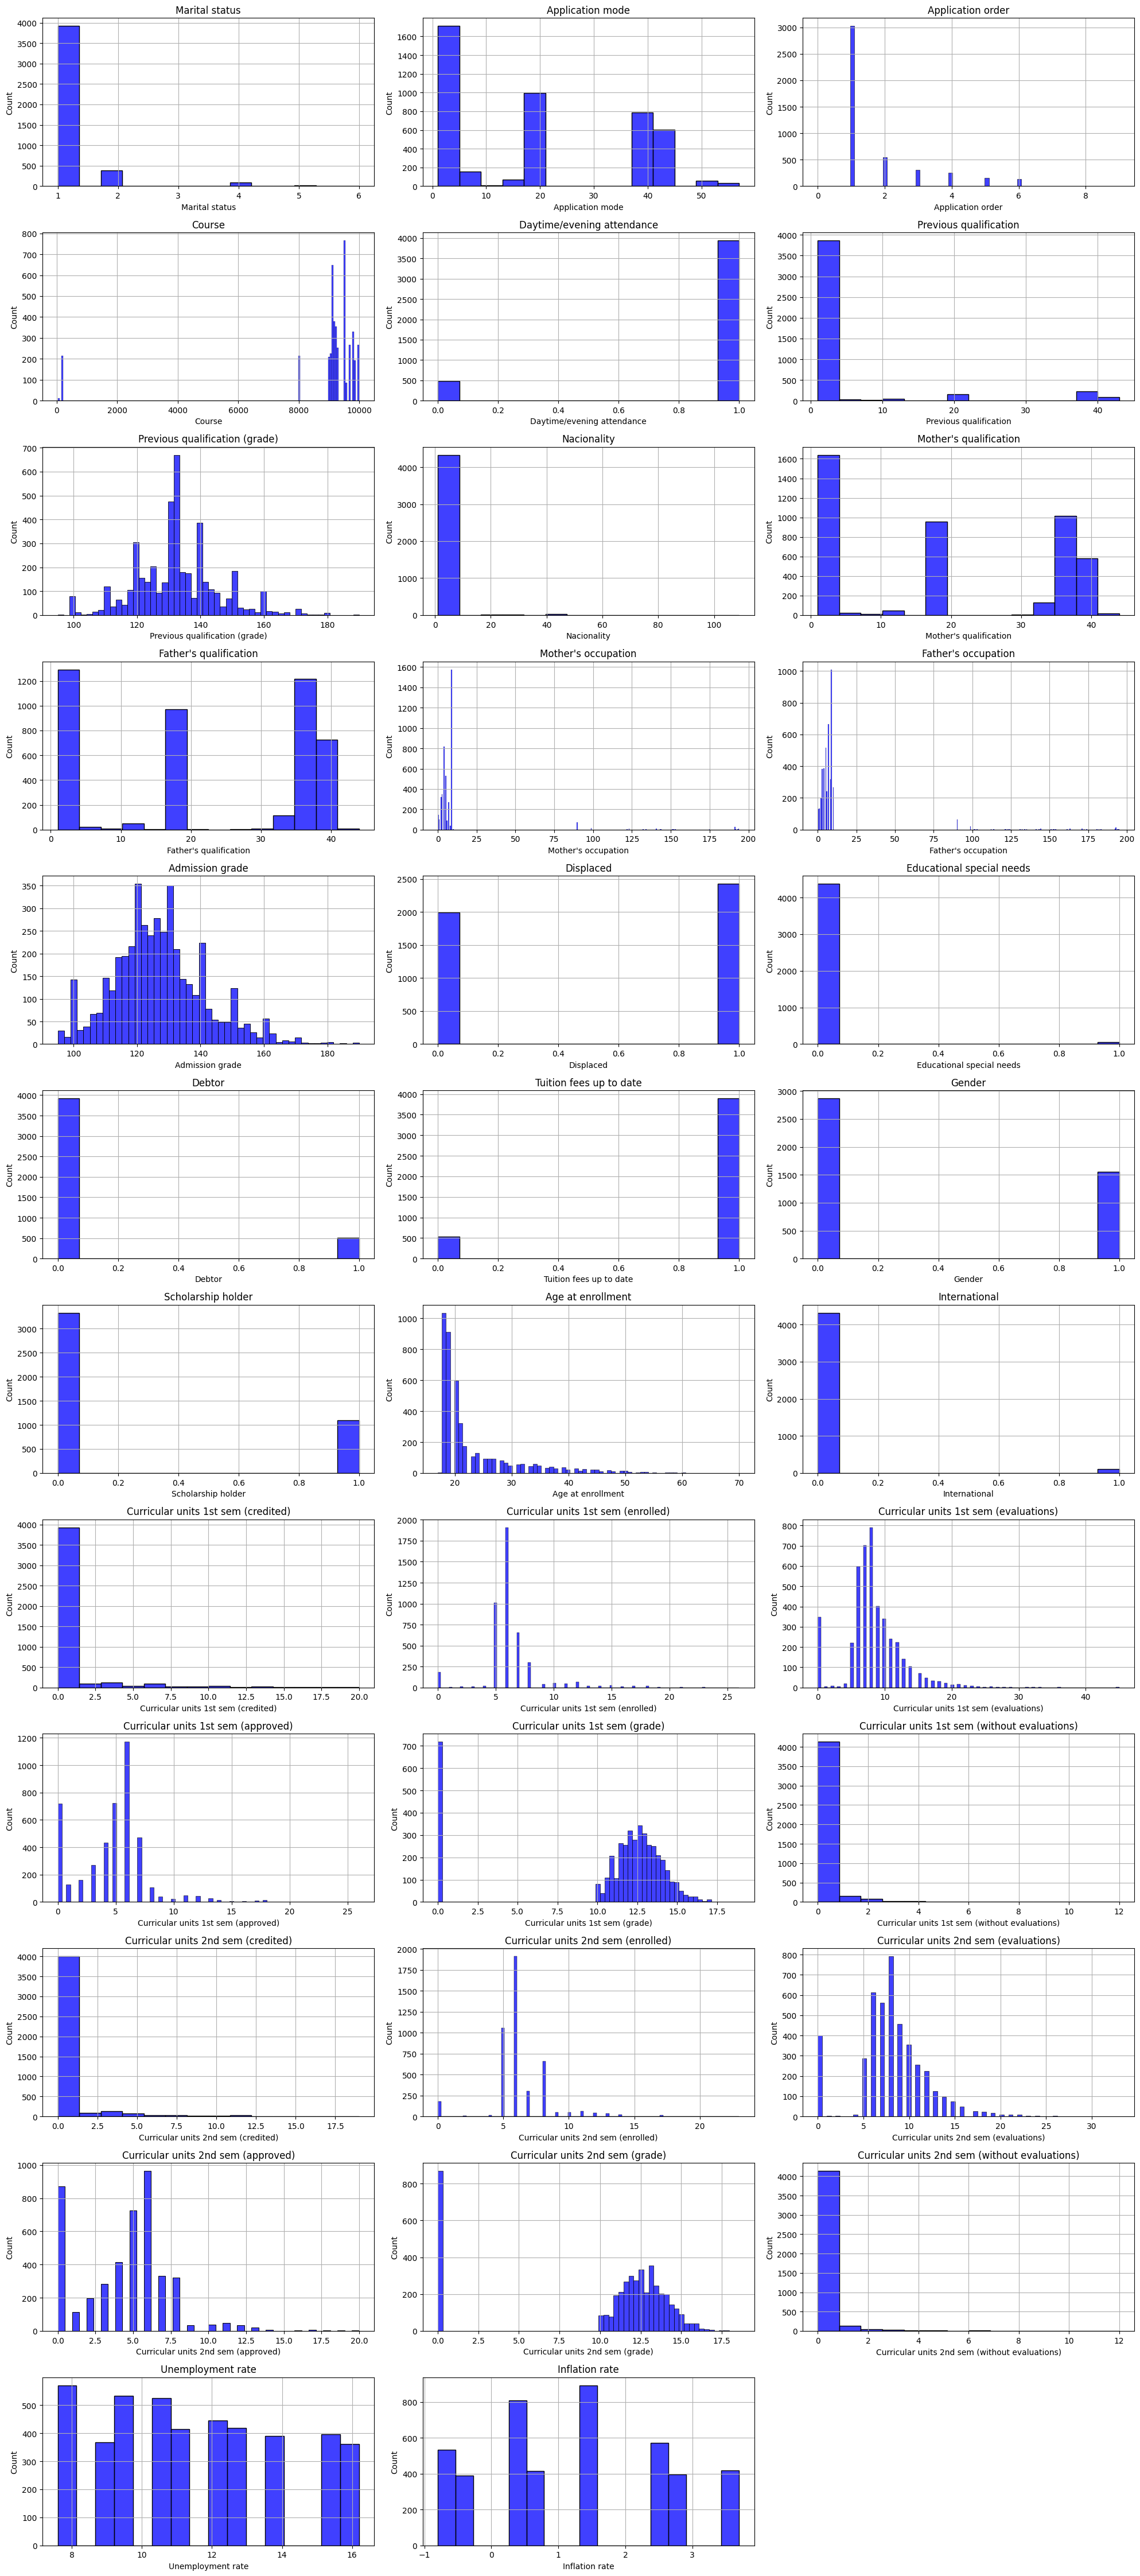

In [77]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# FIX: Remove tab characters ('\t') from column names
df.columns = df.columns.str.replace('\t', '')

plt.figure(figsize=(20, 45))

# Loop through columns (ensure we don't exceed actual column count)
num_columns_to_plot = min(35, len(df.columns))

for i in range(num_columns_to_plot):
    plt.subplot(12, 3, i+1)
    
    # Plotting the histogram
    sns.histplot(df.iloc[:, i], color='blue')
    
    plt.title(df.columns[i]) # Explicitly set title
    plt.grid(True)

plt.tight_layout() # Adjusts spacing so plots don't overlap
plt.show()

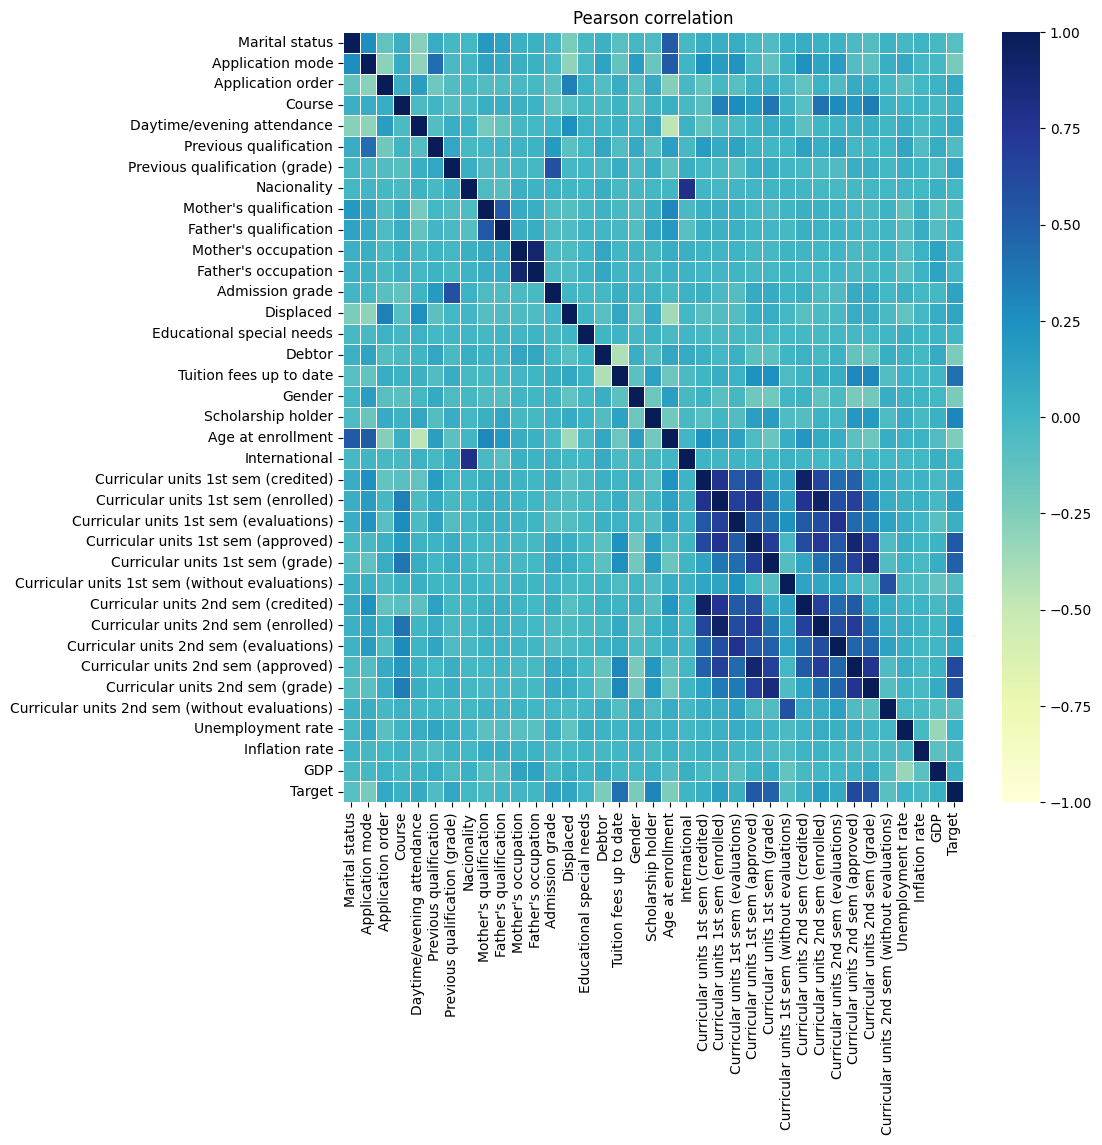

In [78]:
# 1. FIX: Clean the column names to remove the invisible tab characters
df.columns = df.columns.str.replace('\t', '')

# 2. Compute correlation matrix
# numeric_only=True is safer in case you have any string columns left
corr_matrix = df.corr(method="pearson", numeric_only=True)

# 3. Plot the Heatmap
plt.figure(figsize=(10, 10)) 
sns.heatmap(
    corr_matrix, 
    vmin=-1., 
    vmax=1., 
    annot=False, 
    fmt='.2f', 
    cmap="YlGnBu", 
    cbar=True, 
    linewidths=0.5
)
plt.title("Pearson correlation")
plt.show()

In [79]:
["Tuition fees up to date","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]
corr_matrix["Target"]

Marital status                                   -0.089804
Application mode                                 -0.221747
Application order                                 0.089791
Course                                            0.034219
Daytime/evening attendance                        0.075107
Previous qualification                           -0.056039
Previous qualification (grade)                    0.103764
Nacionality                                      -0.014801
Mother's qualification                           -0.043178
Father's qualification                           -0.001393
Mother's occupation                              -0.005629
Father's occupation                              -0.001899
Admission grade                                   0.120889
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.4098

# Assertion

In [80]:
df.drop(df[df['Target'] == 1].index, inplace = True)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


In [81]:
df['Dropout'] = df['Target'].apply(lambda x: 1 if x==0 else 0)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Dropout
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,6,8,5,12.666667,0,15.5,2.8,-4.06,2,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,6,2,11.000000,0,11.1,0.6,2.02,0,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,8,9,1,13.500000,0,13.9,-0.3,0.79,0,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,2,0


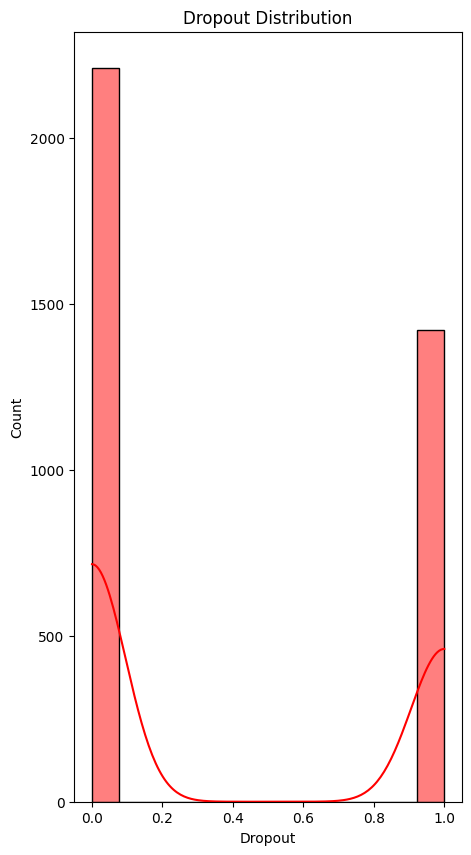

In [82]:
plt.figure(figsize=(5, 10))

# kde=True adds the smooth density line that distplot used to have
sns.histplot(df['Dropout'], color="red", kde=True)

plt.title("Dropout Distribution")
plt.show()

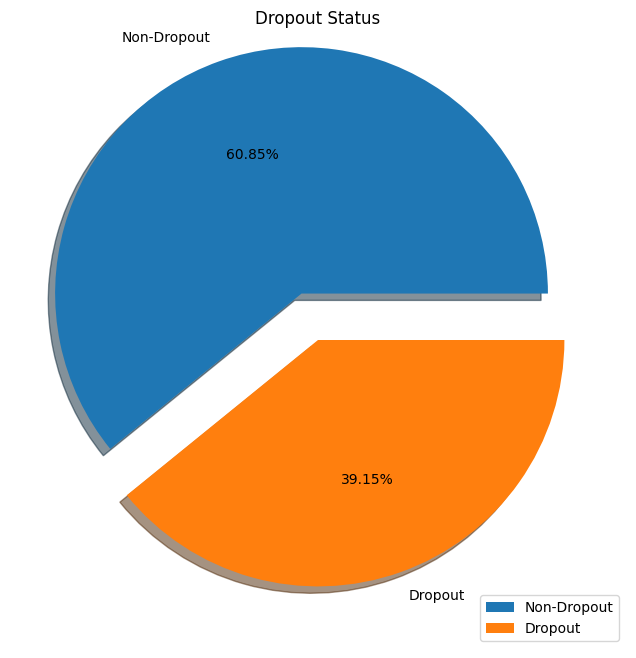

In [83]:
plt.figure(figsize=(8, 8))
plt.title("Dropout Status")
plt.pie(df['Dropout'].value_counts(),  labels = ['Non-Dropout', 'Dropout'], explode = (0.2, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

# Standard Scaling the Data

In [84]:
x = df.iloc[:, :36].values
#x = df[["Tuition fees up to date","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]].values
print(x)
x = StandardScaler().fit_transform(x)
x

[[ 1.   17.    5.   ... 10.8   1.4   1.74]
 [ 1.   15.    1.   ... 13.9  -0.3   0.79]
 [ 1.    1.    5.   ... 10.8   1.4   1.74]
 ...
 [ 1.    1.    1.   ... 13.9  -0.3   0.79]
 [ 1.    1.    1.   ...  9.4  -0.8  -3.12]
 [ 1.   10.    1.   ... 12.7   3.7  -1.7 ]]


array([[-0.30068558, -0.08191671,  2.4368225 , ..., -0.31131218,
         0.12161459,  0.77411864],
       [-0.30068558, -0.19714928, -0.56247077, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558, -1.00377727,  2.4368225 , ..., -0.31131218,
         0.12161459,  0.77411864],
       ...,
       [-0.30068558, -1.00377727, -0.56247077, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558, -1.00377727, -0.56247077, ..., -0.83619059,
        -1.46715379, -1.37663355],
       [-0.30068558, -0.4852307 , -0.56247077, ...,  0.4010228 ,
         1.78259971, -0.74822447]])

In [85]:
y = df['Dropout'].values
y

array([1, 0, 1, ..., 1, 0, 0])

# Train & Test Splitting the Data

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [87]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

## Decision Tree Model

In [88]:
bagging_dt = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=7, criterion='entropy', random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

In [89]:
bagging_dt.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=7,
                                                   random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [90]:
bagging_pred = bagging_dt.predict(x_test)

=== Bagging (Decision Tree Ensemble) Evaluation ===
Accuracy: 0.9022038567493113

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       448
           1       0.93      0.81      0.86       278

    accuracy                           0.90       726
   macro avg       0.91      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



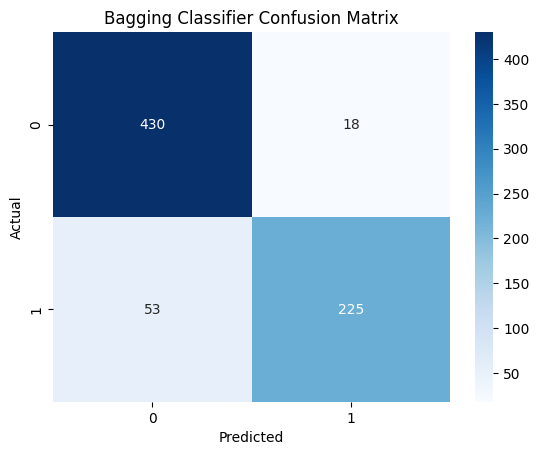

In [91]:
# 2. Evaluate Bagging Model
print("=== Bagging (Decision Tree Ensemble) Evaluation ===")
print("Accuracy:", accuracy_score(y_test, bagging_pred))
print("\nClassification Report:\n", classification_report(y_test, bagging_pred))

# 3. Confusion Matrix (Using bagging_pred, NOT dt_best_pred)
# Note: We use bagging_pred here because that is the prediction variable created above
sns.heatmap(confusion_matrix(y_test, bagging_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Bagging Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## XGBoost Model

In [92]:
xgb_param_dist = {
    'n_estimators': randint(200, 600),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5),
    'reg_alpha': uniform(0, 2),
    'reg_lambda': uniform(0, 2)
}

In [93]:
xgb_model_opt = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [94]:
xgb_random = RandomizedSearchCV(
    estimator=xgb_model_opt,
    param_distributions=xgb_param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

In [95]:
xgb_random.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.749816047538945, gamma=4.75357153204958, learning_rate=0.22959818254342154, max_depth=7, n_estimators=220, reg_alpha=0.31203728088487304, reg_lambda=0.3119890406724053, subsample=0.6232334448672797; total time=   0.2s
[CV] END colsample_bytree=0.749816047538945, gamma=4.75357153204958, learning_rate=0.22959818254342154, max_depth=7, n_estimators=220, reg_alpha=0.31203728088487304, reg_lambda=0.3119890406724053, subsample=0.6232334448672797; total time=   0.2s
[CV] END colsample_bytree=0.9464704583099741, gamma=3.005575058716044, learning_rate=0.22242177333881366, max_depth=8, n_estimators=508, reg_alpha=1.9398197043239886, reg_lambda=1.6648852816008435, subsample=0.6849356442713105; total time=   0.3s
[CV] END colsample_bytree=0.6727299868828402, gamma=0.9170225492671691, learning_rate=0.1012726728878613, max_depth=8, n_estimators=452, reg_alpha=0.8638900372842315, reg_lambda=0.5824582803960838, s

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fcce41cdf90>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fcce6dceb90>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fcce6dcfc50>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fcce6ed34d0>},
                   random_state=42, scoring='accuracy', verbose=2)

=== Best XGBoost Parameters (Randomized Search) ===
{'colsample_bytree': 0.6727299868828402, 'gamma': 0.9170225492671691, 'learning_rate': 0.1012726728878613, 'max_depth': 8, 'n_estimators': 452, 'reg_alpha': 0.8638900372842315, 'reg_lambda': 0.5824582803960838, 'subsample': 0.8447411578889518}

Accuracy: 0.9214876033057852

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       448
           1       0.93      0.86      0.89       278

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.92       726
weighted avg       0.92      0.92      0.92       726



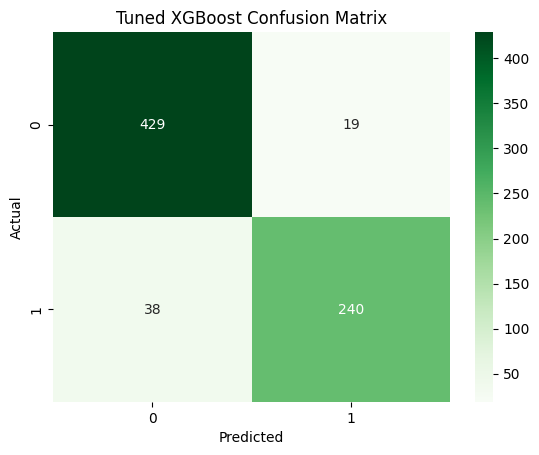

In [96]:
print("=== Best XGBoost Parameters (Randomized Search) ===")
print(xgb_random.best_params_)

xgb_best_rand = xgb_random.best_estimator_
xgb_best_rand_pred = xgb_best_rand.predict(x_test) # <--- Variable defined here

print("\nAccuracy:", accuracy_score(y_test, xgb_best_rand_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_best_rand_pred))

# 4. Confusion matrix (CORRECTED LINE BELOW)
# Changed xgb_best_pred to xgb_best_rand_pred to match the variable above
sns.heatmap(confusion_matrix(y_test, xgb_best_rand_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Tuned XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [99]:
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42), # random_state ensures reproducible results
    rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [100]:
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [101]:
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(x_test)

=== Best Random Forest Parameters ===
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}

=== Best Random Forest Evaluation ===
Accuracy: 0.9118457300275482

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       448
           1       0.93      0.83      0.88       278

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



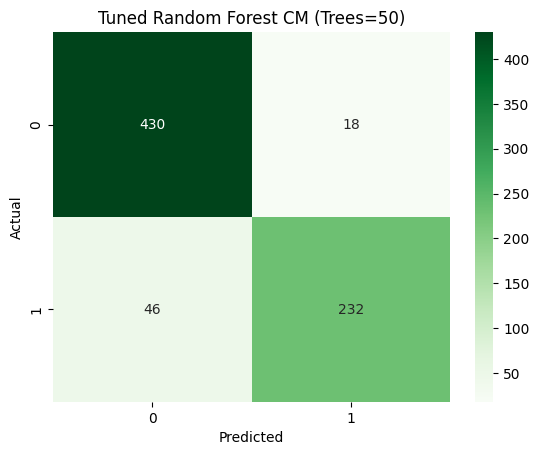

In [102]:
print("=== Best Random Forest Parameters ===")
print(rf_grid.best_params_)

print("\n=== Best Random Forest Evaluation ===")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

# 5. Confusion Matrix
# Using 'Greens' cmap to fit the "Forest" theme
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Greens')
plt.title(f"Tuned Random Forest CM (Trees={rf_grid.best_params_['n_estimators']})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Logistic regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [104]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42))
])

In [105]:
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2']
}

In [106]:
lr_grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [107]:
lr_grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(random_state=42,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

=== Best Logistic Regression Parameters ===
{'logreg__C': 1, 'logreg__penalty': 'l2'}

=== Logistic Regression Evaluation ===
Accuracy: 0.9146005509641874

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       448
           1       0.93      0.85      0.88       278

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.92      0.91      0.91       726



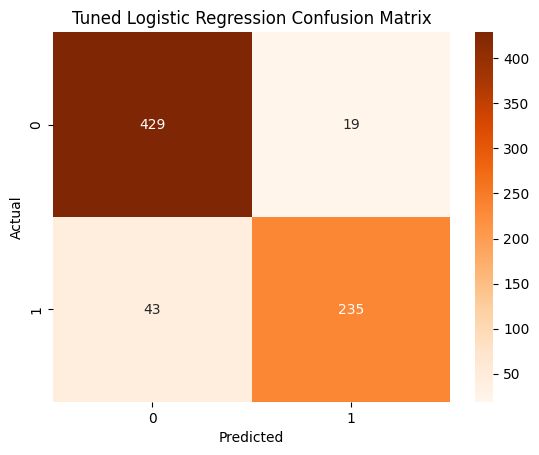

In [108]:
lr_best = lr_grid.best_estimator_
y_pred_lr = lr_best.predict(x_test)

print("=== Best Logistic Regression Parameters ===")
print(lr_grid.best_params_)

print("\n=== Logistic Regression Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# 6. Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Oranges')
plt.title("Tuned Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

=== Model Comparison Table ===
                     Model  Accuracy  Precision    Recall  F1 Score
1          XGBoost (Tuned)  0.921488   0.921697  0.921488  0.920914
3      Logistic Regression  0.914601   0.915139  0.914601  0.913788
2    Random Forest (Tuned)  0.911846   0.912796  0.911846  0.910844
0  Bagging (Decision Tree)  0.902204   0.903923  0.902204  0.900757


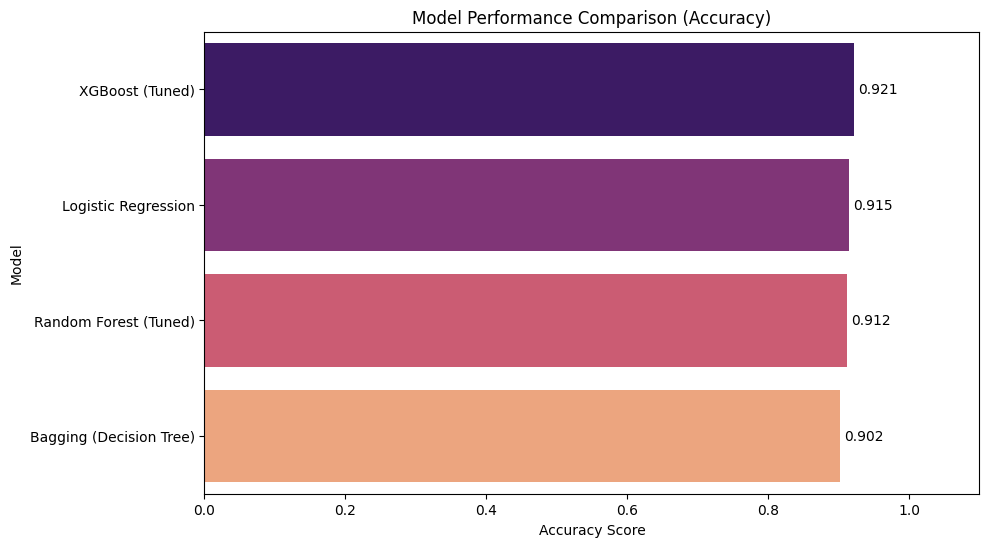

In [109]:
# 1. Collect all predictions in a dictionary
# Ensure 'rf_pred' exists (run the Random Forest code block first)
model_predictions = {
    "Bagging (Decision Tree)": bagging_pred,
    "XGBoost (Tuned)": xgb_best_rand_pred,
    "Random Forest (Tuned)": rf_pred,      # <--- Replaced KNN here
    "Logistic Regression": y_pred_lr
}

# 2. Calculate Metrics for each model
results = []

for model_name, predictions in model_predictions.items():
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions, average='weighted') # 'weighted' handles multi-class
    rec = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    
    results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# 3. Create a DataFrame and Sort by Accuracy
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Display the table
print("=== Model Comparison Table ===")
print(results_df)

# 4. Visualize the Comparison
plt.figure(figsize=(10, 6))
# Changed palette to 'magma' for high contrast
ax = sns.barplot(x="Accuracy", y="Model", data=results_df, palette="magma")

# Add text labels on the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.3f', padding=3)

plt.title("Model Performance Comparison (Accuracy)")
plt.xlim(0, 1.1) # Extended slightly to fit labels
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.show()